# Metadata to standardize datasets in memory

In [167]:
datasets = {
    'ushhs': 'breach_report.csv',
    'iib': 'visualisation-data.csv' # Information is beautiful
}

# Standardize Column Names. Create a dictionary for each data set with original name and standardized column name

standardized_names = {
    'iib': {
        'Entity': 'entity',
        'records lost': 'records',
        'YEAR': 'year',
        'SECTOR': 'sector',
        'METHOD': 'method'
    },
    'ushhs': {
        'Name of Covered Entity': 'entity',
        'Individuals Affected': 'records',
        'Breach Submission Date': 'year',
        'Covered Entity Type': 'sector',
        'Type of Breach': 'method'
    }
}

# Load the datasets

In [168]:
import csv
import os

data = {}

#load data from CSV files
for key in datasets:
    with (open(os.path.join('data', datasets[key]))) as csvfile:
        reader = csv.DictReader(csvfile, escapechar='\\')
        data[key] = [r for r in reader]

In [169]:
# standardize column names

std_cols = {}

for key in data:
    std_names = standardized_names[key]
    std_rows = []
    raw_data = data[key]
    for row in raw_data:
        std_row = {}
        for name in std_names:
            std_row[std_names[name]] = row[name]
            
        std_rows.append(std_row)
    std_cols[key] = std_rows
    print(std_rows[0])
    


{'entity': 'Healthcare Administrative Partners', 'records': '17693', 'year': '12/03/2019', 'sector': 'Business Associate', 'method': 'Hacking/IT Incident'}
{'entity': 'AOL', 'records': '92,000,000', 'year': '2004', 'sector': 'web', 'method': 'inside job'}


In [170]:
# Standardize values

import locale
import datetime

locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' )

def atoi(s):
    if s is None or len(s) == 0:
        return 0
    else:
        return locale.atoi(s)
    
def year_for_ushhs(date):
    return datetime.datetime.strptime(date, '%m/%d/%Y').year

def year_for_iib(year):
    return int(year)
    
std_funcs = {
    'iib': {
        'records': atoi,
        'year': year_for_iib
    },
    'ushhs': {
        'records': atoi,
        'year': year_for_ushhs
    }
}

std_data = []
for key in std_cols:
    std_rows = []
    for row in std_cols[key]:
        std_row = {}
        for col in row:
            if col in std_funcs[key]:
                std_row[col] = std_funcs[key][col](row[col])
            else:
                std_row[col] = row[col]
                
        std_rows.append(std_row)
        
    std_data.extend(std_rows)
    

In [177]:
# Aggregrate by method and create a pie chart

method_count = {}
row_count = {}

def standardize_method_name(method_name):
    if method_name == "hacked":
        return "Hacking/IT Incident"
    return method_name
    
for row in std_data:
    if len(row['method']) > 0:
        method = standardize_method_name(row['method'])
        if method in method_count:
            method_count[method] += 1
            row_count[method] += row['records']
        else:
            method_count[method] =1
            row_count[method] = row['records']
        
print(method_count)
print(row_count)

{'Hacking/IT Incident': 559, 'Theft': 49, 'Unauthorized Access/Disclosure': 160, 'Loss': 15, 'Improper Disposal': 10, 'inside job': 20, 'lost device': 47, 'oops!': 19, 'poor security': 42, 'telecoms': 1}
{'Hacking/IT Incident': 8687311688, 'Theft': 311751, 'Unauthorized Access/Disclosure': 7489809, 'Loss': 73984, 'Improper Disposal': 342876, 'inside job': 363741405, 'lost device': 215875202, 'oops!': 2442144628, 'poor security': 4775938648, 'telecoms': 170000}


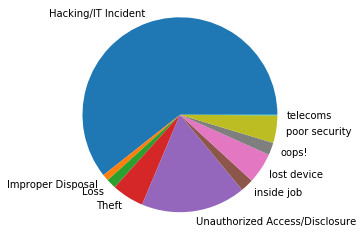

In [178]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()

ax1.pie([method_count[k] for k in sorted(method_count.keys())], 
        labels=sorted(method_count.keys()))
ax1.axis('equal')

plt.show()

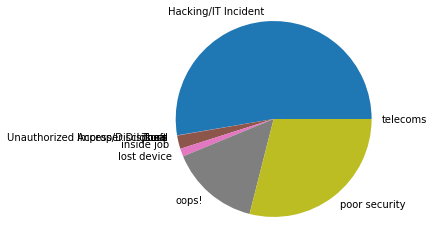

In [179]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()

ax1.pie([row_count[k] for k in sorted(method_count.keys())], 
        labels=sorted(method_count.keys()))
ax1.axis('equal')

plt.show()
